In [1]:
# import the libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns 
%matplotlib inline
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn import metrics # for the check the error and accuracy of the model

In [2]:
# importing our dataset
df = pd.read_csv("/content/breastCancer.csv")
# reading the file
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# now lets look at the type of data we have. We can use 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
# drop null and unnecessary colunms
df.drop(["Unnamed: 32","id",],axis=1,inplace=True)

In [5]:

# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'diagnosis'.
df['diagnosis']= label_encoder.fit_transform(df['diagnosis'])
 
df['diagnosis'].unique()

array([1, 0])

In [6]:
X=df.copy()
y=X.pop('diagnosis')

In [7]:
#lets normalize the columns for the purpose of visualization:
X_norm=(X - X.mean()) / (X.std()) 

In [8]:
X_norm=X_norm.join(y)

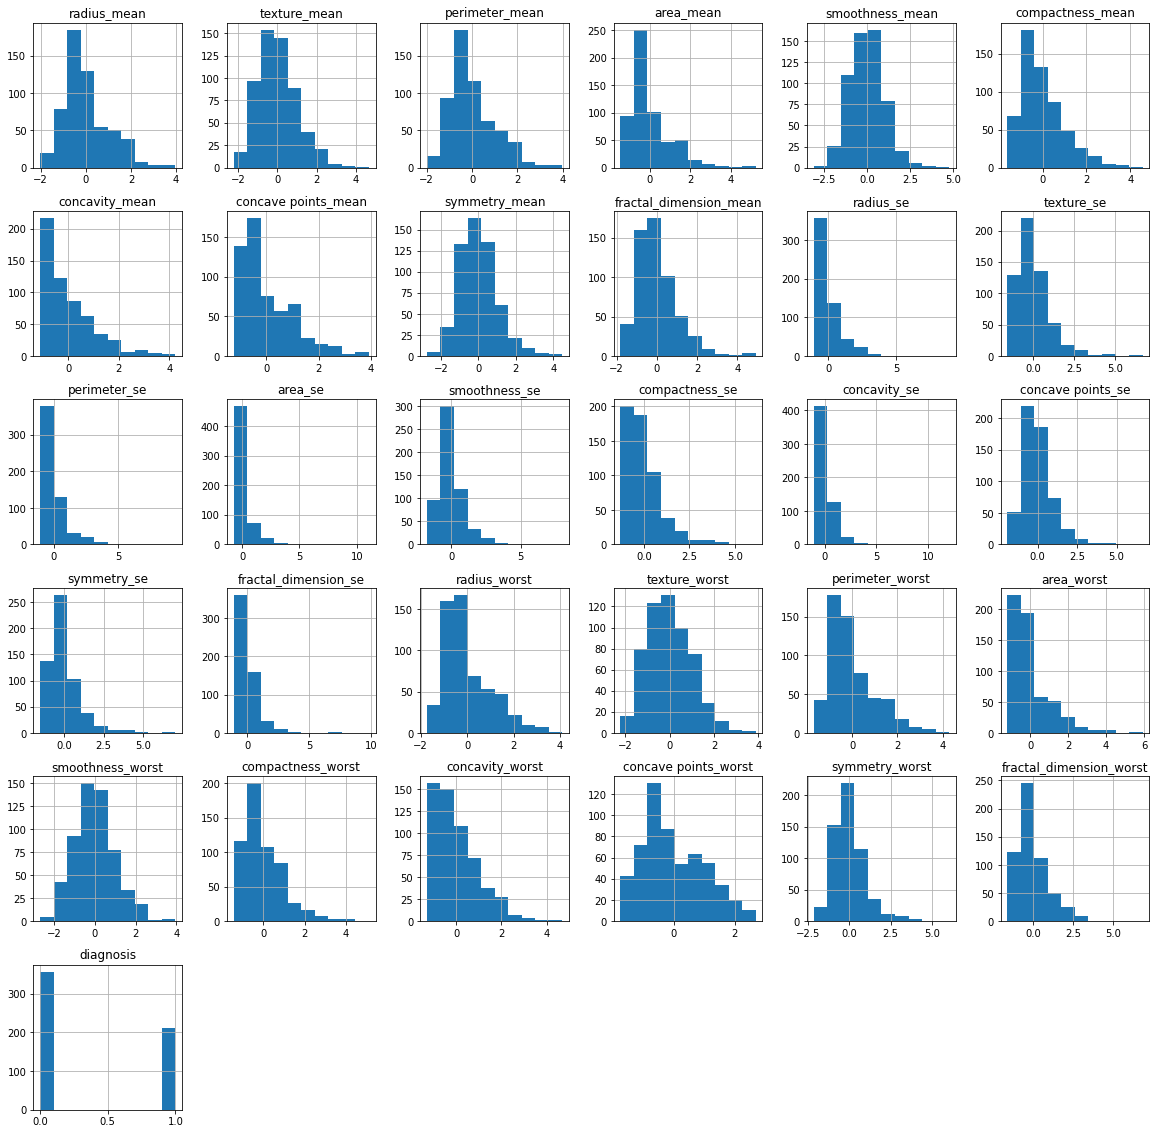

In [9]:
X_norm.hist(figsize=(20,20))
plt.show()

In [10]:
#lets split them so we can visualize them easier!
pt1=X_norm.iloc[:,0:10].join(X_norm.diagnosis)
pt2=X_norm.iloc[:,10:20].join(X_norm.diagnosis)
pt3=X_norm.iloc[:,20:30].join(X_norm.diagnosis)

X_mlt1=pt1.melt(id_vars='diagnosis', value_vars=pt1.columns)
X_mlt2=pt2.melt(id_vars='diagnosis', value_vars=pt2.columns)
X_mlt3=pt3.melt(id_vars='diagnosis', value_vars=pt3.columns)

Because we'll be plotting frequently, it's best to utilise functions:

In [11]:
def swarm(df):
    plt.figure(figsize=(10,10))
    sns.swarmplot(x='variable',y='value',hue='diagnosis',data=df)
    plt.xticks(rotation=90)
    return plt.show()

In [12]:
def violin(df):
    plt.figure(figsize=(10,10))
    sns.violinplot(x='variable',y='value',hue='diagnosis',data=df,split=True, inner='quart')
    plt.xticks(rotation=90)
    return plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 41.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 41.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 41.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 46.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 39.7% of the points cannot be placed; y

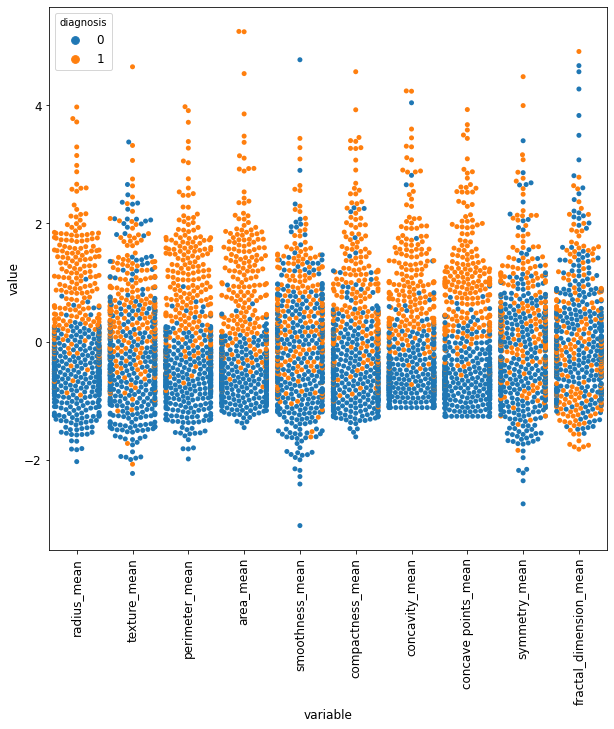

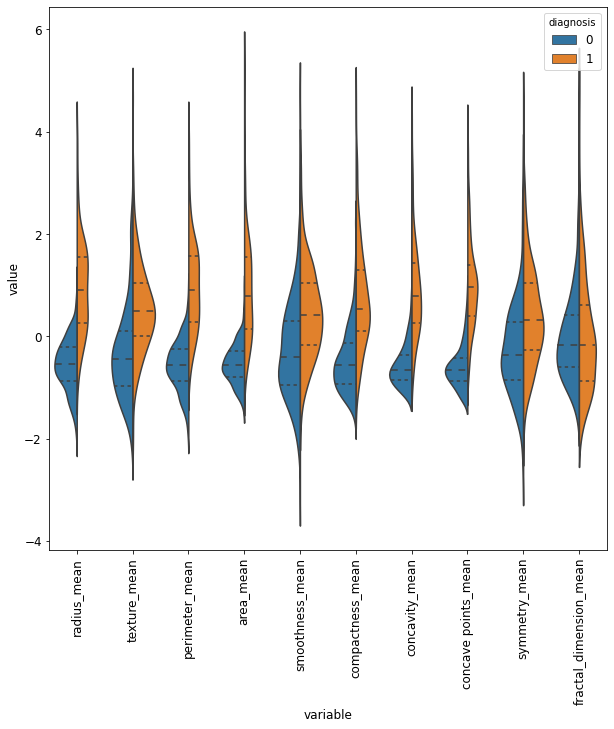

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 65.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 61.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 66.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 71.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 62.6% of the points cannot be placed; y

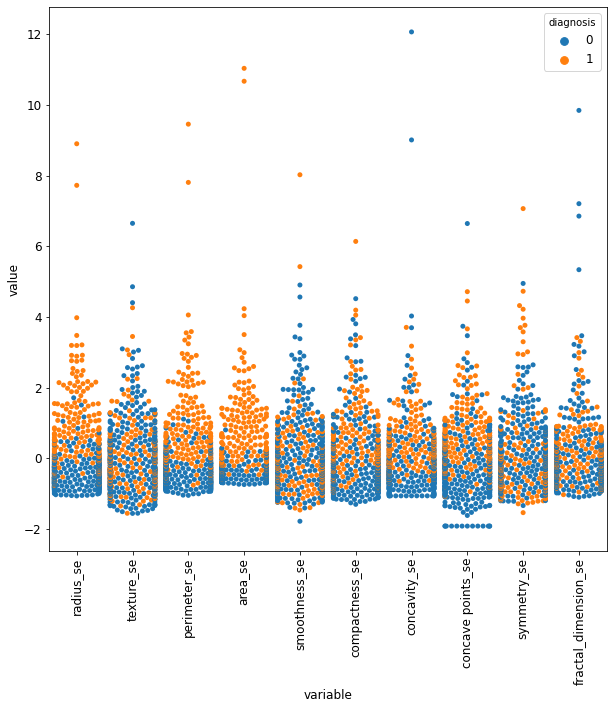

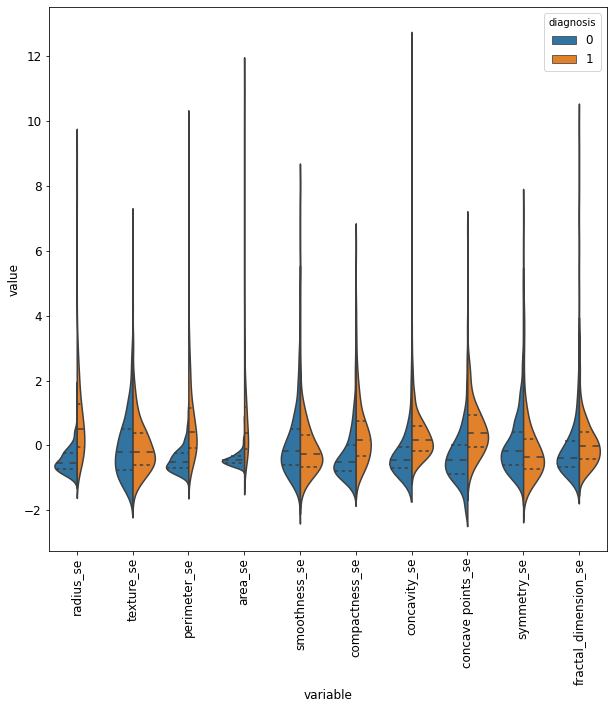

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 47.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 45.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 48.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 54.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 43.9% of the points cannot be placed; y

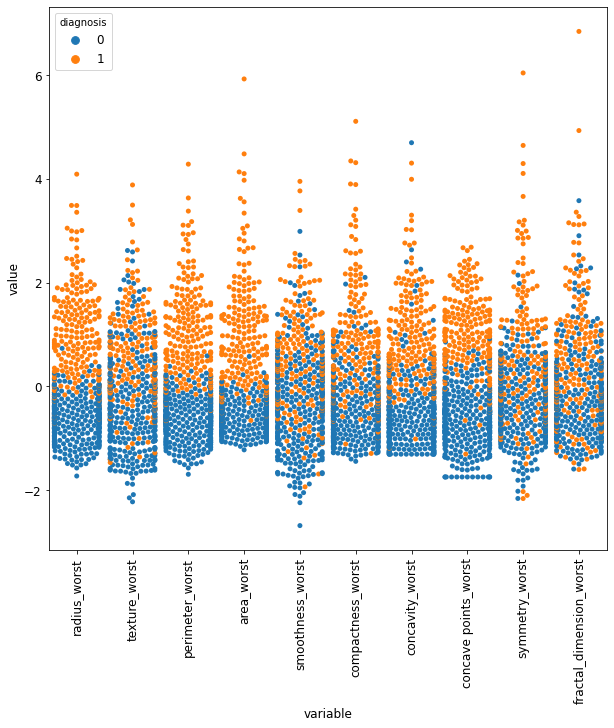

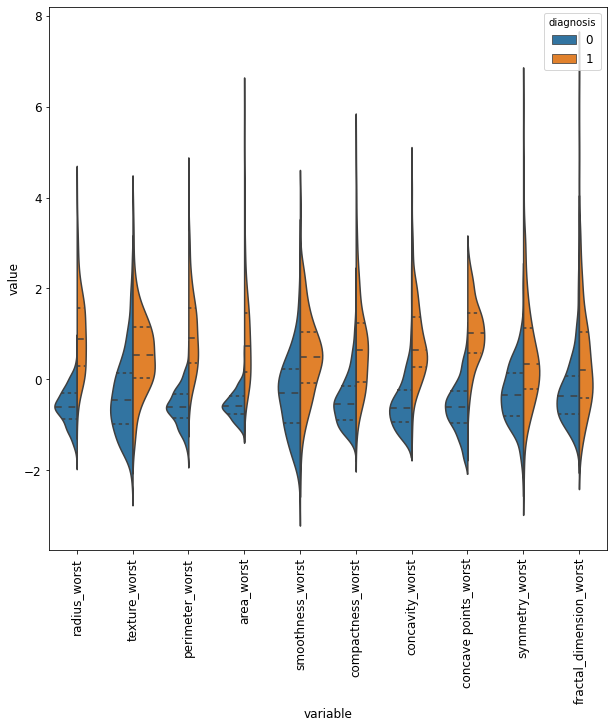

In [13]:
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)
plt.rc('axes', labelsize=12) # fontsize of the x and y labels
plt.rc('legend', fontsize=12)    # legend fontsize
swarm(X_mlt1)
violin(X_mlt1)
swarm(X_mlt2)
violin(X_mlt2)
swarm(X_mlt3)
violin(X_mlt3)

Taking a look at the swarm plots and the violin plots, we can see that:

1- We can observe that several features, such as "concave points mean" and "concave mean," have violin plots that are extremely similar. This indicates their values and distributions are comparable, and they are essentially functioning in the same way in influencing the result, therefore we don't need to utilise both of them; we can simply keep one!

2- If the B and M parts of the violin plot are almost symmetrical, it suggests that changing values of that feature haven't created a difference in B and M, thus it's probably safe to remove these characteristics as well!

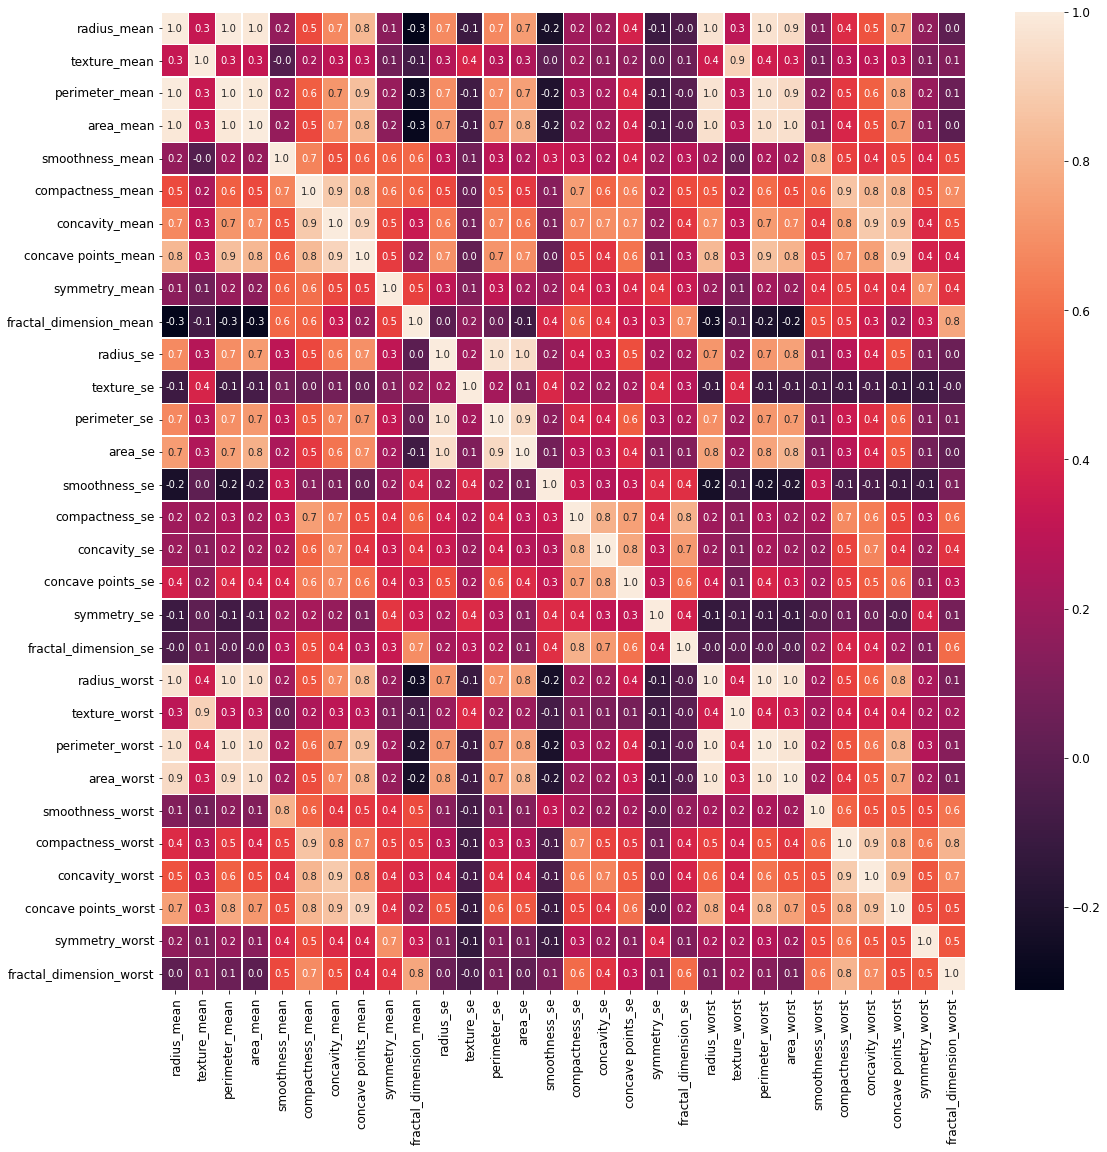

In [14]:
plt.figure(figsize=(18,18))
sns.heatmap(X.corr(), annot=True, linewidth=.4,fmt=".1f")

The heatmap reveals the substantial correlation between "concave points mean" and "concave mean." As a result, dropping one of them is unlikely to reduce accuracy. We can also seek for other characteristics with a strong correlation and use the same methodology to them!

To choose these characteristics, we can follow the steps below:

1- Look for comparable shapes in violin plots and characteristics in violin plots that are similar.

2- After grouping comparable features, we may examine the swarm plot to discover which feature in each group best distinguishes B and M (better classification), and maintain that feature.

In [15]:
drop_list=['area_worst','perimeter_worst','smoothness_worst','fractal_dimension_worst','concavity_worst','compactness_worst',
           'radius_se','perimeter_se','smoothness_se','compactness_se','concave points_se','fractal_dimension_se','radius_mean','perimeter_mean',
           'symmetry_mean','smoothness_mean','compactness_mean','concavity_mean']
X1 = X.drop(drop_list,axis = 1 )  
X1.shape


(569, 12)

In [16]:
X1.columns

Index(['texture_mean', 'area_mean', 'concave points_mean',
       'fractal_dimension_mean', 'texture_se', 'area_se', 'concavity_se',
       'symmetry_se', 'radius_worst', 'texture_worst', 'concave points_worst',
       'symmetry_worst'],
      dtype='object')

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=1) # 70% training and 30% test
# Create RandomForest Classifier object
model = RandomForestClassifier(n_estimators=20)
# Train RandomForest Classifier
model.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = model.predict(X_test)
print(f"Accuracy of model is {round(metrics.accuracy_score(y_test, y_pred)*100, 2)}%")

Accuracy of model is 94.74%


#Feature Selection Using RFECV

In [18]:
from sklearn.feature_selection import RFECV
rfecv=RFECV(estimator=model,step=1,cv=10,scoring='accuracy')
#since it uses cross validation, we should fit it to the whole dataset
rfecv.fit(X1,y)

RFECV(cv=10, estimator=RandomForestClassifier(n_estimators=20),
      scoring='accuracy')

In [19]:
#to get number of the features
display('Number of features:', rfecv.n_features_)

#to get feature names
list(X1.columns[rfecv.support_]) 

'Number of features:'

9

['texture_mean',
 'area_mean',
 'concave points_mean',
 'area_se',
 'concavity_se',
 'radius_worst',
 'texture_worst',
 'concave points_worst',
 'symmetry_worst']

In [20]:
rfecv.cv_results_['mean_test_score']

array([0.85770677, 0.92973058, 0.93674812, 0.94207393, 0.95081454,
       0.95964912, 0.96130952, 0.96491228, 0.96838972, 0.96134085,
       0.96137218, 0.96315789])

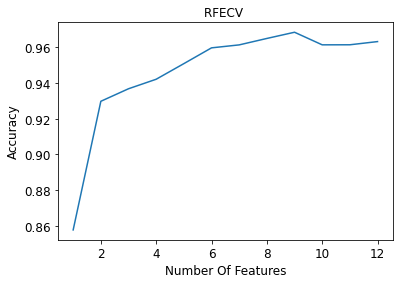

In [27]:
plt.title("RFECV ")
plt.xlabel("Number Of Features")
plt.ylabel("Accuracy")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

In [28]:
selected_feature=['texture_mean','area_mean','concave points_mean','area_se','concavity_se','radius_worst','texture_worst','concave points_worst','symmetry_worst']
X2=df[selected_feature]

In [38]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X2, y, test_size=0.3, random_state=1) # 70% training and 30% test
# Create RandomForest Classifier object
model = RandomForestClassifier(n_estimators=20)
# Train RandomForest Classifier
model.fit(X1_train, y1_train)
#Predict the response for test dataset
y1_pred = model.predict(X1_test)
print(f"Accuracy of model is {round(metrics.accuracy_score(y1_test, y1_pred)*100, 2)}%")

Accuracy of model is 96.49%


In [39]:
#exporting the model
import pickle
pickle.dump(model, open('BreastCancer.pkl', 'wb'))